EDA on Gas Array dataset, this is taken fron UCI Machine learning repository

In [0]:
import os,sys
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
import glob
files= glob.glob("batch*.dat")

for f in files:
  df= pd.read_csv(f, sep="\s+",index_col=0, header=None)

In [0]:
for col in df.columns.values:
  df[col]= df[col].apply(lambda x: float(str(x).split(":")[1]))

In [0]:
df= df.rename_axis("Gas").reset_index()

In [169]:
df

,Gas,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,21749.5635,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.0440,2.713281,3.612213,4.281570,5.026986,-3.252127,-3.995530,-11.599578,2601.8249,2.085748,0.723314,1.161237,1.587376,-0.516412,-0.824780,-1.112882,2602.6865,2.074977,0.723795,1.216273,2.594866,-0.520201,-0.855015,-2.791243,1218.5497,2.092544,0.395898,0.863491,1.145358,-0.252613,-0.408573,...,2369.0144,2.202927,0.675708,1.110452,1.405526,-0.477064,-0.760527,-0.986015,1636.1588,2.163980,0.535716,1.052986,1.820696,-0.332063,-0.530287,-1.500841,1657.3080,2.161844,0.553001,1.157846,1.508133,-0.334765,-0.535050,-1.521051,3955.4094,2.519815,1.205705,2.145977,2.597082,-0.838715,-1.352179,-3.798715,3573.0447,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
1,1,44240.5029,4.734847,8.465927,10.472258,12.127556,-7.794601,-10.380901,-11.469262,41403.9775,4.997612,8.512048,10.743542,11.512547,-6.916281,-9.015912,-10.007661,4940.8962,3.596926,1.337665,2.393620,2.645707,-0.892834,-1.209882,-1.564656,4953.6831,3.527018,1.323978,2.373133,3.399857,-0.883676,-1.276746,-2.748824,1959.3813,2.901716,0.683342,1.699412,2.299562,-0.409589,-0.656458,...,4330.5199,3.722393,1.232009,2.271416,2.560336,-0.810536,-1.119311,-1.531264,2563.6379,2.960525,0.910096,2.051669,2.486318,-0.515123,-0.798402,-1.163281,2582.1899,2.961590,0.950969,2.306715,2.919239,-0.532555,-0.861866,-1.196304,6842.0261,4.211758,2.225815,4.432344,4.964263,-1.390097,-2.045014,-2.404711,6096.0249,4.313923,2.043073,4.367389,4.970501,-1.277148,-1.949090,-2.349524
2,1,68772.5175,7.185827,12.939696,16.515253,17.584706,-13.122877,-16.675905,-19.863589,62188.7920,7.174904,12.819989,17.056267,17.887395,-11.550467,-14.312501,-16.644908,6448.0721,4.407664,1.753448,3.258870,3.680344,-1.234064,-1.654513,-2.201029,6496.1289,4.374607,1.721112,3.272768,4.432163,-1.218590,-1.688561,-3.578410,2470.2889,3.374293,0.860196,2.223278,2.720470,-0.542549,-0.857364,...,5640.6719,4.580926,1.588238,3.056693,3.501445,-1.122138,-1.494335,-2.143273,3224.7167,3.473162,1.163587,2.827995,3.460136,-0.671301,-1.000354,-1.487174,3204.2544,3.403279,1.196609,3.028432,3.743220,-0.692017,-1.150905,-1.976136,8964.0998,5.290577,2.913050,6.215735,7.046270,-1.905266,-2.833125,-4.892295,7867.2899,5.301873,2.652663,5.948563,6.630909,-1.734698,-2.711049,-4.501320
3,1,68632.8301,6.923039,20.863585,27.186135,28.511701,-13.455499,-18.530967,-24.082598,60900.0478,7.047728,20.075783,27.092673,28.497865,-11.303620,-15.690707,-42.278174,7380.5871,4.912847,2.175083,4.234287,4.750555,-1.474048,-2.087509,-3.011204,7318.1543,4.802547,2.122949,4.128097,5.309772,-1.442512,-2.038493,-3.963493,2787.6227,3.657489,1.037539,2.748630,3.587757,-0.625165,-0.954701,...,6466.0394,5.139247,1.947185,3.937232,4.642369,-1.334312,-1.885995,-2.710004,3565.5542,3.684362,1.363992,3.365953,4.002330,-0.767695,-1.129730,-1.777671,3599.3106,3.683582,1.434062,3.771243,4.559309,-0.795082,-1.264770,-2.008626,10176.1777,5.808720,3.602918,7.804032,8.808343,-2.243375,-3.247409,-4.278507,9043.5935,5.995390,3.259087,7.593368,8.427209,-2.054283,-3.145986,-4.389490
4,1,76428.9717,7.898322,19.106577,24.917995,26.406840,-14.923576,-18.863368,-23.360438,65385.9405,7.596745,17.918498,24.290709,25.439535,-12.144892,-15.282271,-17.592323,8300.9015,5.433144,2.326943,4.608669,5.116835,-1.680095,-2.281893,-2.828070,8339.8267,5.407950,2.285301,4.534798,6.205604,-1.650011,-2.291976,-3.734863,3134.6037,3.995079,1.102200,2.894889,3.594460,-0.723864,-1.116067,...,7256.4618,5.661461,2.093700,4.270478,4.742503,-1.532608,-2.077997,-2.456194,4035.9988,4.056310,1.465537,3.678602,4.357740,-0.881423,-1.267264,-1.717070,4006.1371,3.982714,1.515011,3.985141,4.776066,-0.910016,-1.453576,-1.802999,12056.0061,6.781015,3.910929,8.650714,9.

In [139]:
df.groupby(["Gas"])

In [78]:
gas_1= df[df["Gas"]==1]
gas_1

,Gas,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1,21749.5635,2.627488,3.507524,4.110899,5.015697,-3.474738,-4.569693,-13.448491,21138.0440,2.713281,3.612213,4.281570,5.026986,-3.252127,-3.995530,-11.599578,2601.8249,2.085748,0.723314,1.161237,1.587376,-0.516412,-0.824780,-1.112882,2602.6865,2.074977,0.723795,1.216273,2.594866,-0.520201,-0.855015,-2.791243,1218.5497,2.092544,0.395898,0.863491,1.145358,-0.252613,-0.408573,...,2369.0144,2.202927,0.675708,1.110452,1.405526,-0.477064,-0.760527,-0.986015,1636.1588,2.163980,0.535716,1.052986,1.820696,-0.332063,-0.530287,-1.500841,1657.3080,2.161844,0.553001,1.157846,1.508133,-0.334765,-0.535050,-1.521051,3955.4094,2.519815,1.205705,2.145977,2.597082,-0.838715,-1.352179,-3.798715,3573.0447,2.582159,1.120364,2.113358,2.388007,-0.760981,-1.218104,-1.605704
294,1,172239.0742,15.568343,44.245121,62.316265,64.861158,-34.099337,-42.678203,-64.184353,131779.2490,11.305896,35.650203,51.764478,54.323116,-25.854865,-32.530782,-42.032247,17662.7679,10.381134,4.931526,9.342774,10.308760,-3.974925,-5.435973,-6.125671,17222.7084,9.935028,4.865347,9.487102,10.454895,-3.880448,-5.412984,-6.018750,7273.6815,6.041997,2.595935,6.834833,8.266553,-1.742538,-2.695462,...,17236.9310,10.866949,4.898046,9.044077,9.979809,-3.920608,-5.389845,-6.189853,8390.5506,6.240853,3.142572,8.242068,9.942402,-1.962904,-3.139016,-3.751307,8587.0590,6.084618,3.149613,8.140379,9.759993,-1.949271,-3.212771,-3.853312,29282.3947,13.977606,9.921481,19.671231,21.740724,-7.515762,-12.147326,-12.845548,25670.7489,13.548996,8.769530,18.391464,20.250201,-6.467808,-10.248997,-17.732314
293,1,154573.5927,14.240558,39.259379,54.569760,57.415310,-30.423594,-38.120585,-50.780355,119133.1523,10.336005,31.872723,45.643204,48.719090,-23.251946,-29.187098,-41.651073,15846.0749,9.441992,4.404263,8.411074,9.249778,-3.504201,-4.823024,-5.265072,15447.7798,9.067452,4.346113,8.591069,9.515730,-3.432749,-4.784689,-5.605068,6646.1634,5.653700,2.375869,6.270219,7.460709,-1.588302,-2.490101,...,15487.7748,9.918375,4.374265,8.148209,8.915638,-3.465674,-4.730507,-5.376233,7692.9436,5.839516,2.889604,7.500879,9.368493,-1.793640,-2.914734,-3.397292,7888.7637,5.693993,2.903165,7.349094,8.756103,-1.774062,-2.707934,-3.299691,26235.6109,12.768546,8.746139,17.555246,19.246299,-6.684772,-10.835799,-11.975219,23090.5381,12.374228,7.805039,16.427199,18.203049,-5.752653,-9.090321,-9.719764
292,1,136517.4971,13.296880,33.787078,46.466976,50.183073,-26.460506,-33.209403,-46.124729,105758.9277,9.734721,27.784125,39.355481,40.917526,-20.351962,-25.731153,-32.393746,13761.4113,8.356570,3.927127,7.583466,8.307898,-2.972301,-4.037755,-4.628304,13462.8136,8.060622,3.883943,7.702348,8.501661,-2.908518,-4.019764,-4.576307,5894.3436,5.135269,2.194461,5.800729,6.940947,-1.379880,-2.090358,...,13468.4400,8.787729,3.900915,7.306281,8.058126,-2.957182,-4.003763,-4.536101,6867.5307,5.353757,2.678183,6.893122,8.412756,-1.564854,-2.453664,-3.183751,7053.8220,5.218349,2.682659,6.750343,7.969256,-1.561709,-2.356666,-2.860267,22751.3609,11.344198,7.727459,15.623711,17.076508,-5.613961,-8.789761,-9.650445,20154.1775,11.103125,6.909964,14.638732,16.188553,-4.894294,-7.591388,-8.376698
291,1,115355.0879,11.666091,27.777292,37.160469,38.718393,-21.970796,-27.964027,-35.228616,90041.5352,8.744210,23.047542,31.766254,33.135287,-16.992910,-21.712408,-28.430609,11566.2548,7.144625,3.342919,6.465700,7.071115,-2.425265,-3.273102,-3.705924,11415.9548,6.925369,3.318434,6.538513,7.193686,-2.382693,-3.243708,-3.760153,5107.3140,4.564507,1.928758,5.042549,6.137925,-1.158063,-1.777703,...,11357.7735,7.580074,3.329687,6.245073,7.002318,-2.422107,-3.243302,-3.901199,5993.0620,4.789938,2.356987,5.949564,7.285861,-1.321456,-2.095244,-2.602007,6156.0819,4.699619,2.379737,5.906015,7.174909

In [0]:
#When I did PCA, I found that I need to sort the gas since the length did not match for gas 1
df= df.sort_values(by=["Gas"])

### PCA for Dimensionality Reduction

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled.shape
#Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
xtrain= pca.fit_transform(X_scaled)

In [73]:
#Finding out the length of each gas
for i in range(1,7):
  print("length for gas "+str(i))
  print(df[df["Gas"]==i].shape[0])

length for gas 1
164
length for gas 2
334
length for gas 3
100
length for gas 4
109
length for gas 5
532
length for gas 6
5


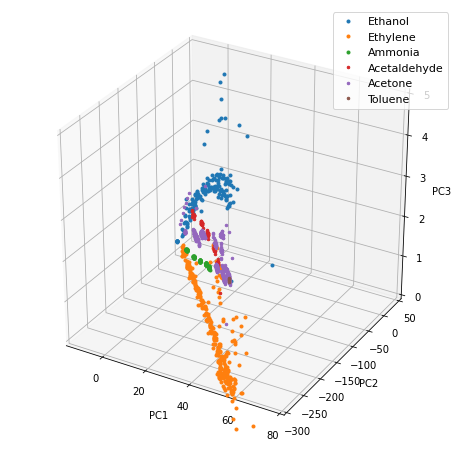

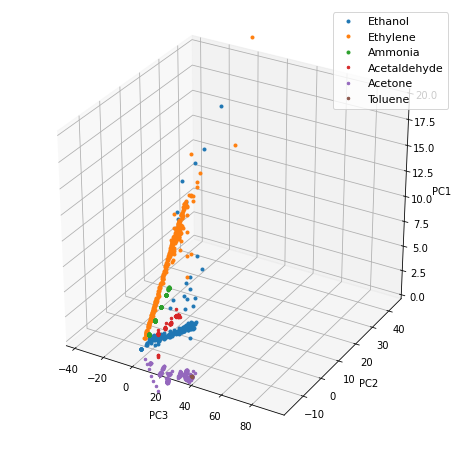

In [165]:
%matplotlib inline  
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 11  
ax.plot(xtrain[0:164,0], xtrain[0:164,1], xtrain[0:164,2], 'o', markersize=3, label='Ethanol')
ax.plot(xtrain[165:(164+334),0], xtrain[165:(164+334),1], xtrain[165:(164+334),2], 'o', markersize=3, label='Ethylene')
ax.plot(xtrain[498:597,0], xtrain[498:597,1], xtrain[498:597,2], 'o', markersize=3, label='Ammonia')
ax.plot(xtrain[598:707,0], xtrain[598:707,1], xtrain[598:707,2], 'o', markersize=2.5, label='Acetaldehyde')
ax.plot(xtrain[708:1239,0], xtrain[708:1239,1], xtrain[708:1239,2], 'o', markersize=2.5, label='Acetone')
ax.plot(xtrain[1230:1235,0], xtrain[1230:1235,1], xtrain[1230:1235,2], 'o', markersize=2.5, label='Toluene')
ax.set_xlabel('PC1')
ax.set_xlim3d(-15, 80)
ax.set_ylabel('PC2')
ax.set_ylim3d(-300, 50)
ax.set_zlabel('PC3')
ax.set_zlim3d(0, 5)
ax.legend(loc='upper right')
plt.show()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 11  
ax.plot(xtrain[0:164,2],xtrain[0:164,0], xtrain[0:164,1], 'o', markersize=3, label='Ethanol')
ax.plot(xtrain[165:(164+334),2],xtrain[165:(164+334),0], xtrain[165:(164+334),1], 'o', markersize=3, label='Ethylene')
ax.plot(xtrain[498:597,2], xtrain[498:597,0], xtrain[498:597,1], 'o', markersize=3, label='Ammonia')
ax.plot(xtrain[598:707,2], xtrain[598:707,0], xtrain[598:707,1], 'o', markersize=2.5, label='Acetaldehyde')
ax.plot(xtrain[708:1239,2], xtrain[708:1239,0], xtrain[708:1239,1], 'o', markersize=2.5, label='Acetone')
ax.plot(xtrain[1230:1235,2], xtrain[1230:1235,0], xtrain[1230:1235,1], 'o', markersize=2.5, label='Toluene')
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')
ax.set_zlim3d(0, 20)
ax.legend(loc='upper right')
plt.show()

###Using LDA for Classification

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
y= np.array(df.iloc[:,0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.1,random_state=42)
lda = LDA(n_components=3)

In [179]:
np.unique(y_train) #Make sure all of our labels are in the training set

array([1, 2, 3, 4, 5, 6])

In [180]:
lda_object= lda.fit(x_train, y_train)
print(lda_object.score(x_test, y_test))
#All correct classification for test set!

1.0


[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5')]

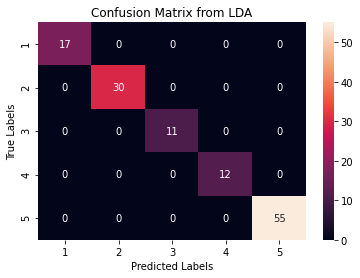

In [187]:
#Creating confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred= lda_object.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
ax=plt.subplot()
sns.heatmap(cm, annot=True)
targets= list(range(1,7))
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix from LDA")
ax.xaxis.set_ticklabels(targets)
ax.yaxis.set_ticklabels(targets)